In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
# plt.rcParams['svg.fonttype'] = 'none'

In [2]:
bc_nms = [
    "H3K4me3", 
    "H3K27ac", 
    "H3K27me3", "EZH2", "EED", "SUZ12", "AEBP2", 
    "MED12", "CycC", 
    "H3K27M",
    "EGFR", "HA-Tag"
]

In [3]:
def CalcPQFromUMICnts(raw_cnts):
    PQ_prop = []
    PQ_Ctrl_normed = []
    for i in range(len(raw_cnts)):
        PQ_prop.append([x / sum(raw_cnts[i]) for x in raw_cnts[i]])
        PQ_Ctrl_normed.append([x / (raw_cnts[i][7] + raw_cnts[i][8]) for x in raw_cnts[i]])

    PQ_prop_avg = []
    PQ_Ctrl_normed_avg = []
    for i in range(len(raw_cnts[0])):
        curr_col = [x[i] for x in PQ_prop]
        PQ_prop_avg.append(np.mean(curr_col))

        curr_norm_col = [x[i] for x in PQ_Ctrl_normed]
        PQ_Ctrl_normed_avg.append(np.mean(curr_norm_col))

    return PQ_prop, PQ_prop_avg, PQ_Ctrl_normed, PQ_Ctrl_normed_avg

In [4]:
# Numbers migrated from outputs of running PQSeq_Data_Analysis.py; see below for the annotation of samples
DIPG_PQ_raw = [
    [33348,22557,13054,12404,13755,62928,8218,8952,18821,83629,3799,3264],
    [25521,32838,12765,15286,15962,77640,7940,9838,21569,99350,3437,3315],
    [6446,15556,1414,2221,3035,5012,285,504,1810,148255,1602,280],
    [5856,14589,1759,2623,2654,7121,316,628,2246,156028,1088,421],
    [19921,30465,2923,6719,9163,16979,928,2278,8800,7048,627,691],
    [16284,24042,2661,6156,6655,19587,615,1884,7139,8704,292,588],
    [10303,45325,2977,9853,17748,27972,4678,4592,14049,23012,9113,1252],
    [9638,38198,3037,9090,15937,24101,4600,4127,12673,22555,8686,1335],
    [11294,7771,62943,8739,12351,16330,1025,1314,3886,2003,3856,658],
    [13218,7954,52743,10009,12840,15305,849,1223,3627,1919,3353,608],
]

all_PQ_avg = []
all_PQ_ctrl_normed_avg = []
# for idx in range(int(len(S02316_PQ_raw) / 2)):
for idx in range(len(DIPG_PQ_raw)):
    curr_PQ_prop, curr_PQ_avg, curr_PQ_ctrl_normed, curr_PQ_ctrl_normed_avg = CalcPQFromUMICnts([DIPG_PQ_raw[idx]])
    all_PQ_avg.append(curr_PQ_avg)
    all_PQ_ctrl_normed_avg.append(curr_PQ_ctrl_normed_avg)

In [5]:
color_thres_num = 60
colors1 = plt.cm.Greys(np.linspace(0, 0.6, color_thres_num))
colors2 = plt.cm.Greys(np.linspace(0.6, 1, 256 - color_thres_num))
colors = np.vstack((colors1, colors2))
customized_cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

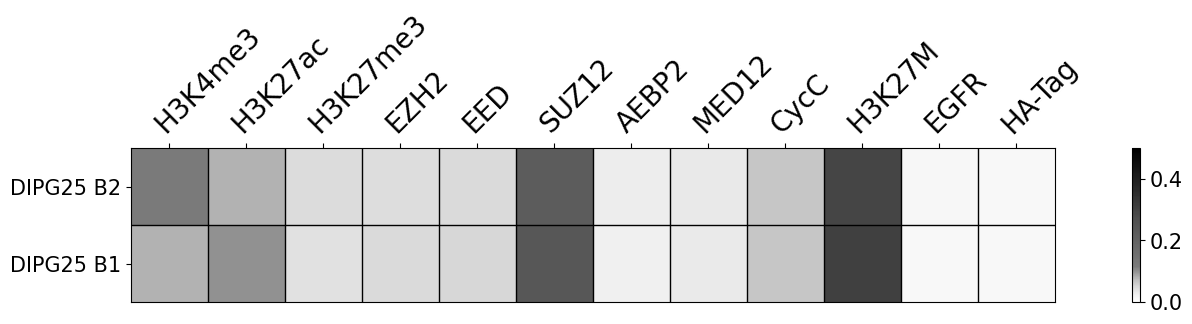

In [6]:
# Multiple plots together as one figure; Prod263
plot_data = all_PQ_avg[0:2]
fig, ax = plt.subplots(figsize = (20, len(plot_data)))

plot_barcodes = bc_nms

y_labels = [
    "DIPG25 B2",
    "DIPG25 B1",
    "DIPG13 B2",
    "DIPG13 B1",
    "DIPG38 B2",
    "DIPG38 B1",
    "DIPG36 B2",
    "DIPG36 B1",
    "DIPG48 B2",
    "DIPG48 B1",
]

im = ax.imshow(plot_data, customized_cmap, vmin = 0, vmax = 0.5)
cbar = fig.colorbar(im, ax = ax)
cbar.ax.tick_params(labelsize = 15)

ax.set_xticks(np.arange(len(plot_barcodes)))
ax.set_yticks([x for x in range(len(plot_data))])
ax.set_xticklabels(plot_barcodes, fontsize = 20)
ax.set_yticklabels(y_labels[0:2], fontsize = 15)


ax.xaxis.tick_top()
plt.setp(ax.get_xticklabels(), rotation = 45, ha = "left",
     rotation_mode = "anchor")

for i in range(len(plot_barcodes) - 1):
    ax.plot([i + 0.5, i + 0.5], [-0.5, -0.5 + len(plot_data)], color = "black", lw = 1)

for i in range(len(plot_data) - 1):
    ax.plot([-0.5, -0.5 + len(plot_barcodes)], [i + 0.5, i + 0.5], color = "black", lw = 1)
# fig.savefig("Supp_DIPG25_PQ_depthnorm.svg", dpi = 1200)

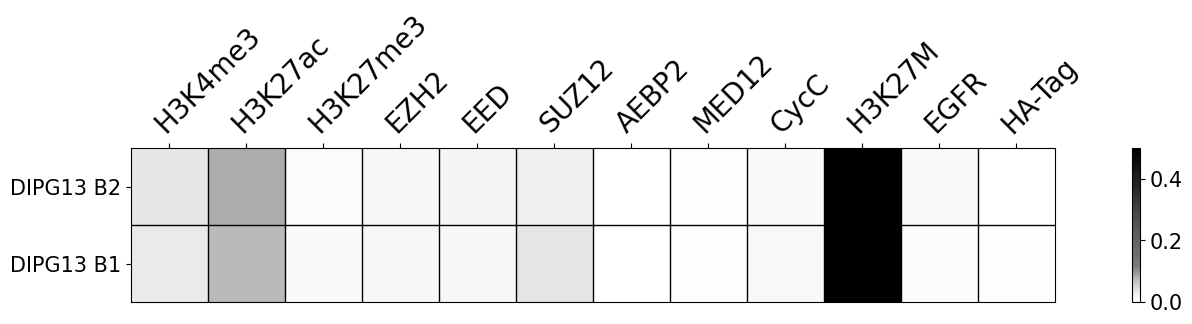

In [7]:
# Multiple plots together as one figure; Prod263
plot_data = all_PQ_avg[2:4]
fig, ax = plt.subplots(figsize = (20, len(plot_data)))

plot_barcodes = bc_nms

im = ax.imshow(plot_data, customized_cmap, vmin = 0, vmax = 0.5)
cbar = fig.colorbar(im, ax = ax)
cbar.ax.tick_params(labelsize = 15)

ax.set_xticks(np.arange(len(plot_barcodes)))
ax.set_yticks([x for x in range(len(plot_data))])
ax.set_xticklabels(plot_barcodes, fontsize = 20)
ax.set_yticklabels(y_labels[2:4], fontsize = 15)


ax.xaxis.tick_top()
plt.setp(ax.get_xticklabels(), rotation = 45, ha = "left",
     rotation_mode = "anchor")

for i in range(len(plot_barcodes) - 1):
    ax.plot([i + 0.5, i + 0.5], [-0.5, -0.5 + len(plot_data)], color = "black", lw = 1)

for i in range(len(plot_data) - 1):
    ax.plot([-0.5, -0.5 + len(plot_barcodes)], [i + 0.5, i + 0.5], color = "black", lw = 1)
# fig.savefig("Supp_DIPG13_PQ_depthnorm.svg", dpi = 1200)

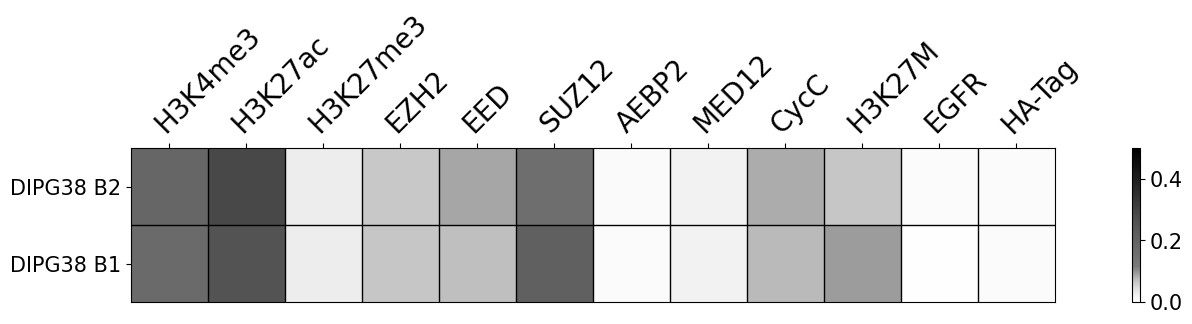

In [8]:
# Multiple plots together as one figure; Prod263
plot_data = all_PQ_avg[4:6]
fig, ax = plt.subplots(figsize = (20, len(plot_data)))

plot_barcodes = bc_nms

im = ax.imshow(plot_data, customized_cmap, vmin = 0, vmax = 0.5)
cbar = fig.colorbar(im, ax = ax)
cbar.ax.tick_params(labelsize = 15)

ax.set_xticks(np.arange(len(plot_barcodes)))
ax.set_yticks([x for x in range(len(plot_data))])
ax.set_xticklabels(plot_barcodes, fontsize = 20)
ax.set_yticklabels(y_labels[4:6], fontsize = 15)


ax.xaxis.tick_top()
plt.setp(ax.get_xticklabels(), rotation = 45, ha = "left",
     rotation_mode = "anchor")

for i in range(len(plot_barcodes) - 1):
    ax.plot([i + 0.5, i + 0.5], [-0.5, -0.5 + len(plot_data)], color = "black", lw = 1)

for i in range(len(plot_data) - 1):
    ax.plot([-0.5, -0.5 + len(plot_barcodes)], [i + 0.5, i + 0.5], color = "black", lw = 1)
# fig.savefig("Supp_DIPG38_PQ_depthnorm.svg", dpi = 1200)

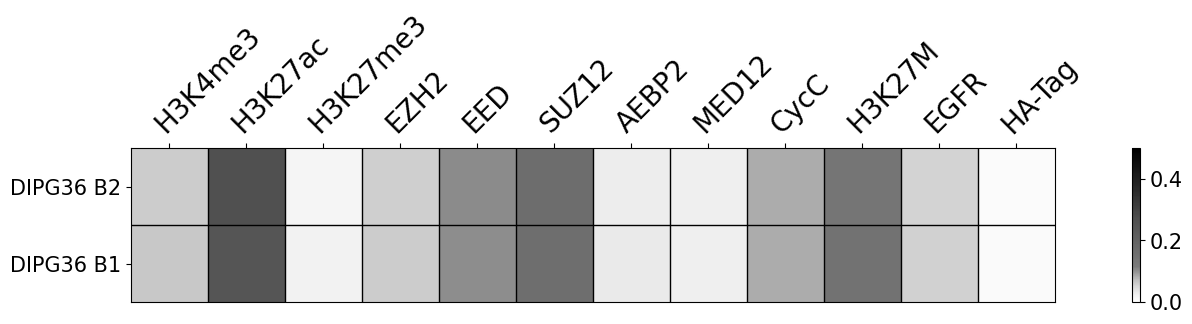

In [9]:
# Multiple plots together as one figure; Prod263
plot_data = all_PQ_avg[6:8]
fig, ax = plt.subplots(figsize = (20, len(plot_data)))

plot_barcodes = bc_nms

im = ax.imshow(plot_data, customized_cmap, vmin = 0, vmax = 0.5)
cbar = fig.colorbar(im, ax = ax)
cbar.ax.tick_params(labelsize = 15)

ax.set_xticks(np.arange(len(plot_barcodes)))
ax.set_yticks([x for x in range(len(plot_data))])
ax.set_xticklabels(plot_barcodes, fontsize = 20)
ax.set_yticklabels(y_labels[6:8], fontsize = 15)


ax.xaxis.tick_top()
plt.setp(ax.get_xticklabels(), rotation = 45, ha = "left",
     rotation_mode = "anchor")

for i in range(len(plot_barcodes) - 1):
    ax.plot([i + 0.5, i + 0.5], [-0.5, -0.5 + len(plot_data)], color = "black", lw = 1)

for i in range(len(plot_data) - 1):
    ax.plot([-0.5, -0.5 + len(plot_barcodes)], [i + 0.5, i + 0.5], color = "black", lw = 1)
# fig.savefig("Supp_DIPG36_PQ_depthnorm.svg", dpi = 1200)

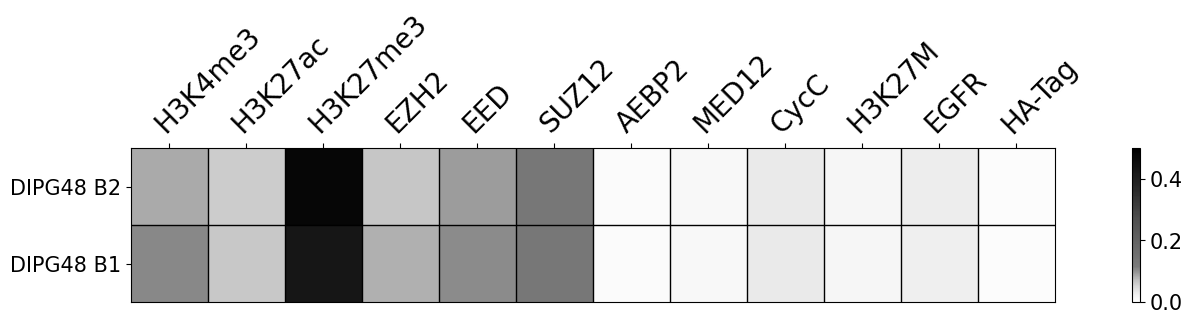

In [10]:
# Multiple plots together as one figure; Prod263
plot_data = all_PQ_avg[8:10]
fig, ax = plt.subplots(figsize = (20, len(plot_data)))

plot_barcodes = bc_nms

im = ax.imshow(plot_data, customized_cmap, vmin = 0, vmax = 0.5)
cbar = fig.colorbar(im, ax = ax)
cbar.ax.tick_params(labelsize = 15)

ax.set_xticks(np.arange(len(plot_barcodes)))
ax.set_yticks([x for x in range(len(plot_data))])
ax.set_xticklabels(plot_barcodes, fontsize = 20)
ax.set_yticklabels(y_labels[8:10], fontsize = 15)


ax.xaxis.tick_top()
plt.setp(ax.get_xticklabels(), rotation = 45, ha = "left",
     rotation_mode = "anchor")

for i in range(len(plot_barcodes) - 1):
    ax.plot([i + 0.5, i + 0.5], [-0.5, -0.5 + len(plot_data)], color = "black", lw = 1)

for i in range(len(plot_data) - 1):
    ax.plot([-0.5, -0.5 + len(plot_barcodes)], [i + 0.5, i + 0.5], color = "black", lw = 1)
# fig.savefig("Supp_DIPG48_PQ_depthnorm.svg", dpi = 1200)